In [1]:
import threerra # Load threerra.py
import numpy as np

In [2]:
# Load IMB Quantum credentials

from qiskit import IBMQ
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
# Choose device
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_armonk')

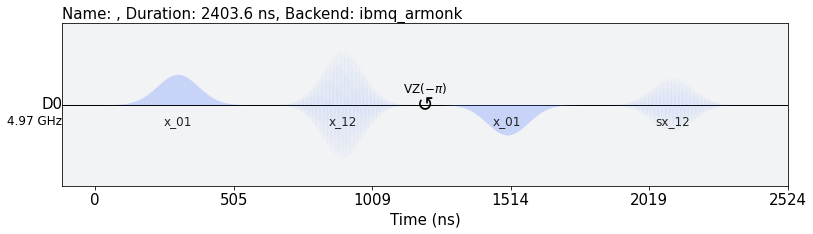

In [4]:
# Test QuantumCircuit3
qc = threerra.QuantumCircuit3(backend)
qc.x_01()
qc.x_12()
qc.rz(np.pi)
qc.x_01()
qc.sx_12()
qc.compile()

# Test calibrations

In [5]:
qc.calibrate_freq_01()

Calibrating qubit_freq_est_01...
Job Status: job has successfully run
qubit_freq_est_01 updated from 4.97158666934091GHz to 4.971595774155789GHz.


In [6]:
qc.calibrate_pi_amp_01()

Calibrating pi_amp_01...
Job Status: job has successfully run
pi_amp_01 updated from 0.1556930479027419 to 0.15498867958589957.


In [7]:
qc.calibrate_freq_12()

Calibrating qubit_freq_est_12...
Job Status: job has successfully run
qubit_freq_est_12 updated from 4.6243937378580835GHz to 4.623463134114069GHz.


In [8]:
qc.calibrate_pi_amp_12()

Calibrating pi_amp_12...
Job Status: job has successfully run
pi_amp_12 updated from 0.2797548240848574 to 0.29087258519227344.
